In [11]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import yfinance as yf
import datetime as dt

In [17]:
## Get data

# Date range
start = dt.datetime(2015, 1, 1)
end = dt.datetime.today()

# Stock symbols and weight
symbols = ["NVDA", "GOOG", "TSLA"]
weights = [0.8, 0.2, 0.0]

# Download data using yfinance
data = yf.download(symbols, start, end)['Close']

# Preview first rows
data.head()

C:\Users\Colin Snow\AppData\Local\Temp\ipykernel_28628\3742963058.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start, end)['Close']
[*********************100%***********************]  3 of 3 completed


Ticker,GOOG,NVDA,TSLA
Date,,,
2015-01-02,25.990793,0.483038,14.620667
2015-01-05,25.448997,0.474880,14.006000
2015-01-06,24.859163,0.460482,14.085333
2015-01-07,24.816578,0.459282,14.063333
2015-01-08,24.894823,0.476559,14.041333


In [18]:
## Compute daily returns

# Use adjusted close for returns
data = data.pct_change()

# Drop first row
returns = data.dropna()

returns.head()

Ticker,GOOG,NVDA,TSLA
Date,,,
2015-01-05,-0.020846,-0.016890,-0.042041
2015-01-06,-0.023177,-0.030318,0.005664
2015-01-07,-0.001713,-0.002605,-0.001562
2015-01-08,0.003153,0.037617,-0.001564
2015-01-09,-0.012951,0.004028,-0.018802


In [19]:
## Monte Carlo simulation

# Number of simulations
numSimulations = 10000

#Randomly sample a day return for each stock
simulatedDailyReturns = returns.sample(n=numSimulations, replace=True).to_numpy()

# Compute portfolio returns
portfolioReturns = simulatedDailyReturns.dot(weights)

#Calculate 5% Value at Risk (VaR)
var95 = np.percentile(portfolioReturns, 5)
print(f"Estimated 5% daily VaR: {var95:.4%}")

Estimated 5% daily VaR: -2.9789%


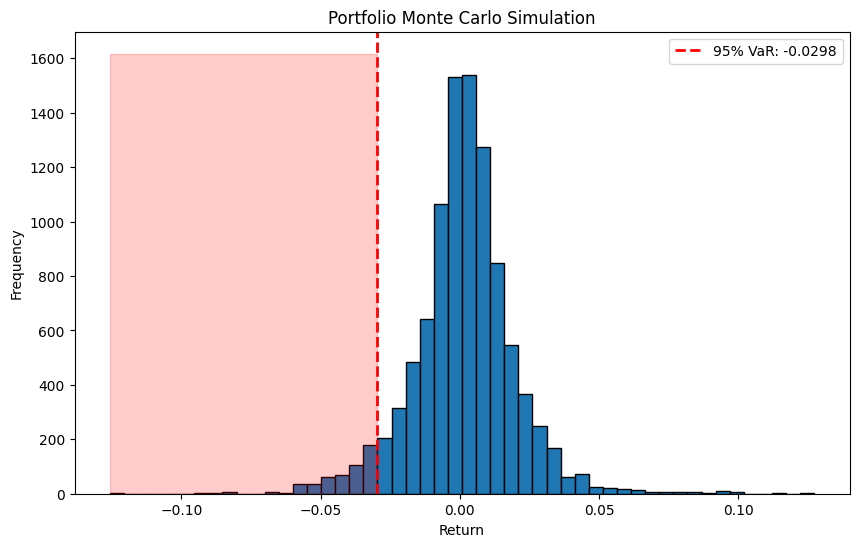

In [21]:
## Ploting a histogram to represent data

plt.figure(figsize=(10,6))

# Plot histogram
plt.hist(portfolioReturns, bins=50, edgecolor='k')

# Plot the Var as vertical line
plt.axvline(var95, color='red', linestyle='--', linewidth=2, label=f'95% VaR: {var95:.4f}')

# Shade in left tail
plt.fill_betweenx(
    y = [0, plt.gca().get_ylim()[1]],
    x1 = min(portfolioReturns),
    x2 = var95,
    color = 'red',
    alpha = 0.2
)

# Histogram labels
plt.title(f"Portfolio Monte Carlo Simulation")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()